# COSC2670 Assignment 2
**Name: Rajesh Magnani<br/>
Student number - s3814464**
<br />
<br />

***
# Task 1: Data Preparation
***

## Import dataset

Dataset to import is `Heart failure clinical records`. <br />
Data source: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records


#### Attribute Information:

There are 13 features in the dataset and 299 rows.

Features information as per the source:
- age: Patient age in years.
- anaemia: Decrease of either red blood cells or haemoglobin.
- high blood pressure: Whether the patient has high blood pressure.
- creatinine phosphokinase (CPK): CPK enzyme level in the blood (mcg/L).
- diabetes: Whether the patient has diabetes.
- ejection fraction: At each contraction, percentage of blood escaping the heart.
- platelets: Blood platelets in kiloplatelets/mL.
- sex: Male or female.
- serum creatinine: Serum creatinine level in the blood (mg/dL).
- serum sodium: Serum sodium level in the blood (mEq/L).
- smoking: Whether the patient smokes.
- time: Follow-up interval in days.
- [target] death event: Whether the patient died during the follow-up period.

In [1]:
# Importing all required python libraries required for this task.
# Import pandas library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# To make sure we can see all the columns
pd.set_option('display.max_columns', None) 

# Load the data from the file heart_failure_clinical_records_dataset.csv using pandas library.
heart_fail_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep = ',')

# Display the head
heart_fail_df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



### Shape
Check the shape of the dataset to confirmed it has downloaded successfully.

In [2]:
heart_fail_df.shape

(299, 13)

Total rows and columns are as expected.

### Column Names

Check all the column names of the dataset.

In [3]:
heart_fail_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

There are 13 columns and names are correctly set. <br />

### Data types
Check the data types of each columns.

In [4]:
heart_fail_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

`Age` data type will require further investigation as it is set as float64 instead of int64. This will be done in 'Data Entry Error' section. 

### Unique values 
Check for unique value to determine if any column needs to be set as index.

In [5]:
heart_fail_df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

No column's unique value is 299. So, none of them can be set as index.

## Missing values

Check to see if any columns contain any missing values.

In [6]:
# Check for missing values in heart_fail_df dataframe
heart_fail_df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no missing values in this dataset.

## Redundant Whitespace
Whitespace is character. It will not be in `int64` or `float64` data types. As data types of all features are either `int64` or `float64` for this dataset, no redundant whitespace check is required.

## Data Entry Error
Investigate `age` attribute to check if float64 data type is correctly set.

In [7]:
import math

def check_float(x):
    fractional, whole = math.modf(x)
    if fractional > 0:
        return True
    else:
        return False

mask_heart_failure = heart_fail_df.apply(lambda x:check_float(x['age']), axis=1)
heart_fail_df[['age']][mask_heart_failure]

,age
185,60.667
188,60.667


Out of 299 rows, only 2 rows has decimal values. This looks to be data entry error. <br />
It will be fixed by forcing the data type of `age` to be int64 which will remove decimal values.

In [8]:
# Simply convert to int64 which will remove the decimal value
heart_fail_df['age'] = heart_fail_df['age'].astype(np.int64)

# Check the data type after conversion
heart_fail_df['age'].dtypes

dtype('int64')

Confirmed the affected rows are fixed.

In [9]:
#Check whether the value is fixed or not
heart_fail_df[['age']][mask_heart_failure]

,age
185,60
188,60


## Impossible Values and Sanity Checks
Due to absence of domain knowledge and limited information provided in the source, the check will be done on `age` attribute only. 

In [10]:
# Age which is less than 0 or greater than 120
mask_age = (heart_fail_df['age'] < 0) | (heart_fail_df['age'] > 120)
print('\nTotal rows where Age is less than 0 or greater than 120:', heart_fail_df[mask_age].shape[0])


Total rows where Age is less than 0 or greater than 120: 0


There are no impossible values in this dataset.

## Outliers
In this part, we will check for outliers and deal with it if required. <br />
Outliers will be checked on attributes which are not boolean i.e., attributes with 2 unique values.

age


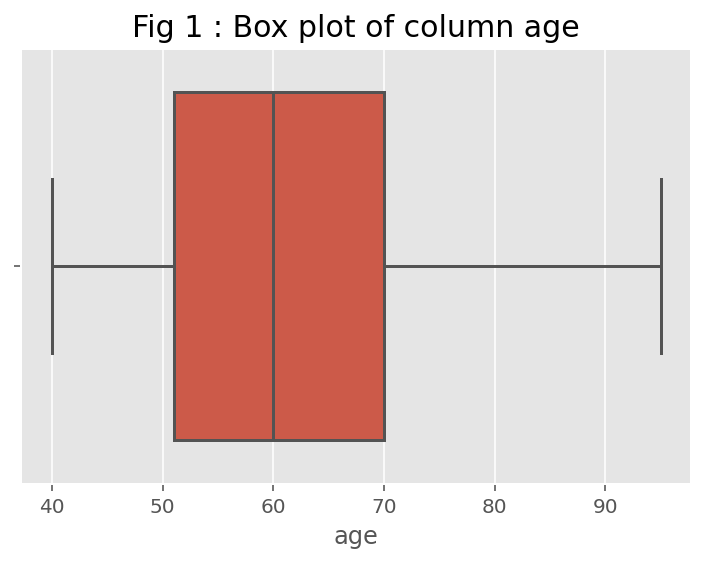

creatinine_phosphokinase


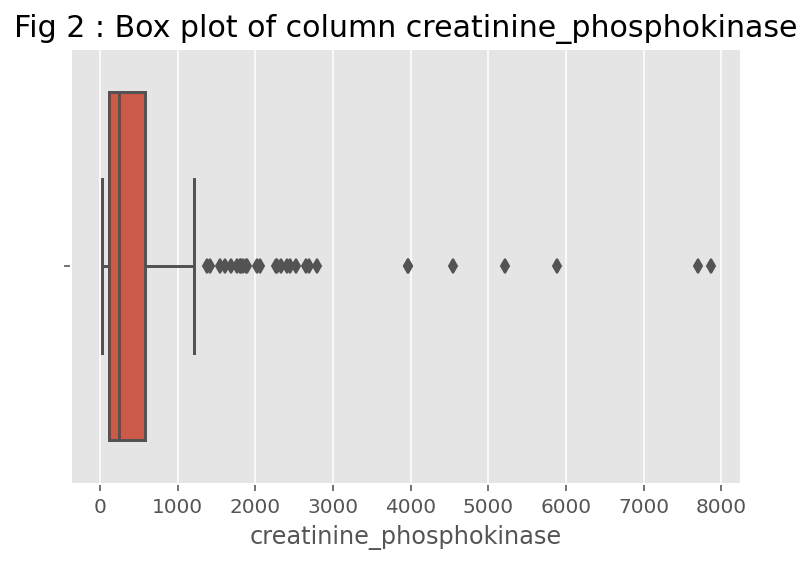

ejection_fraction


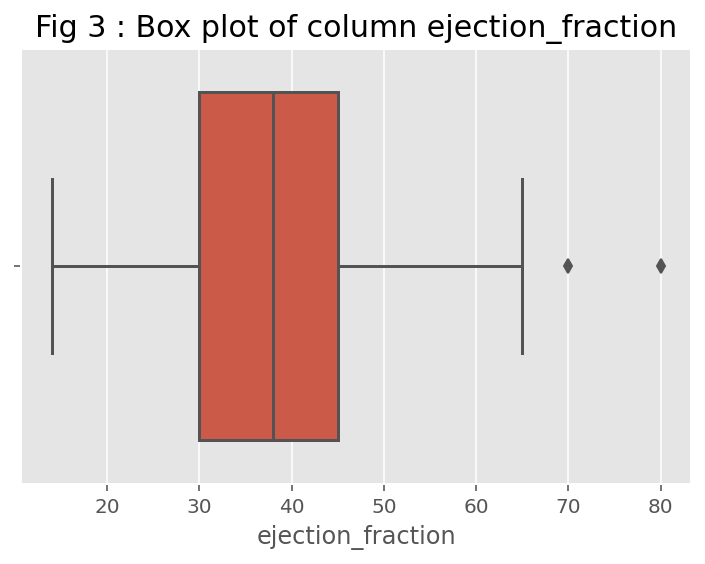

platelets


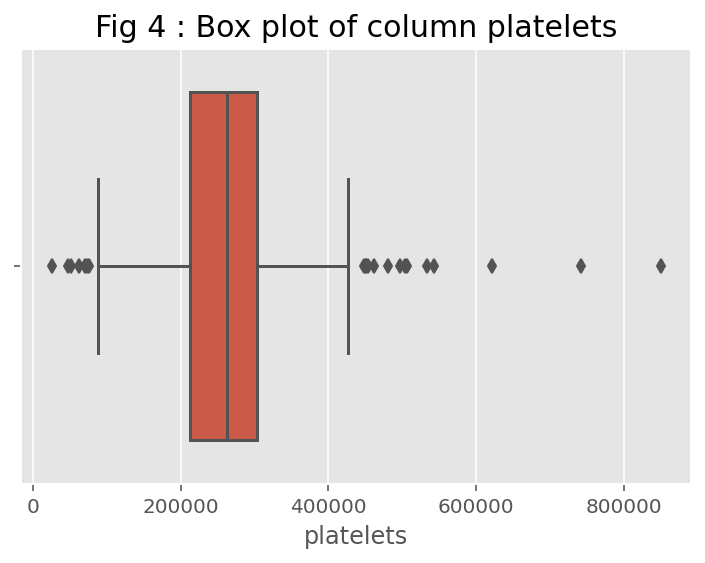

serum_creatinine


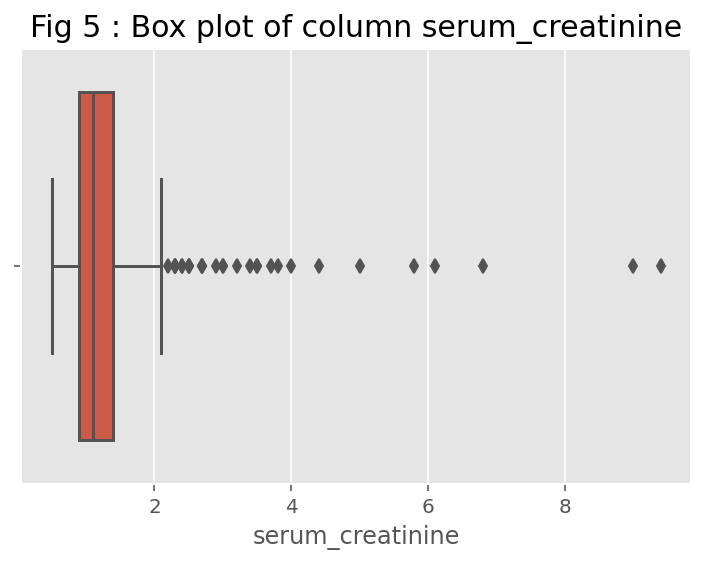

serum_sodium


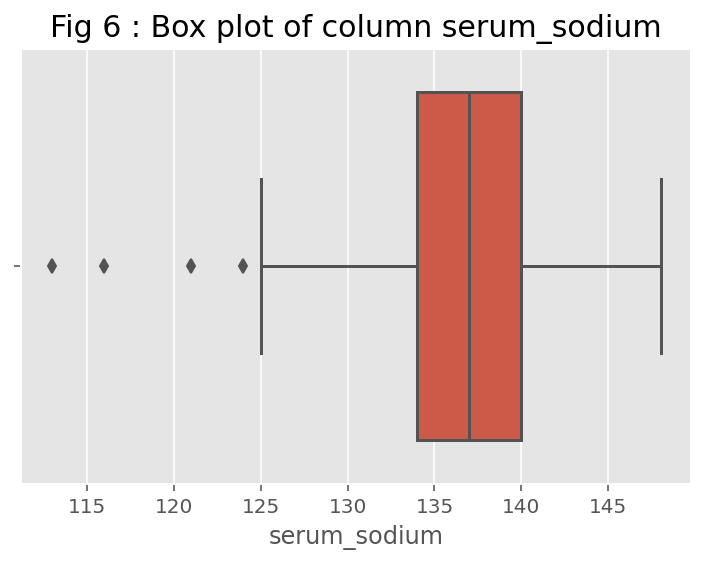

time


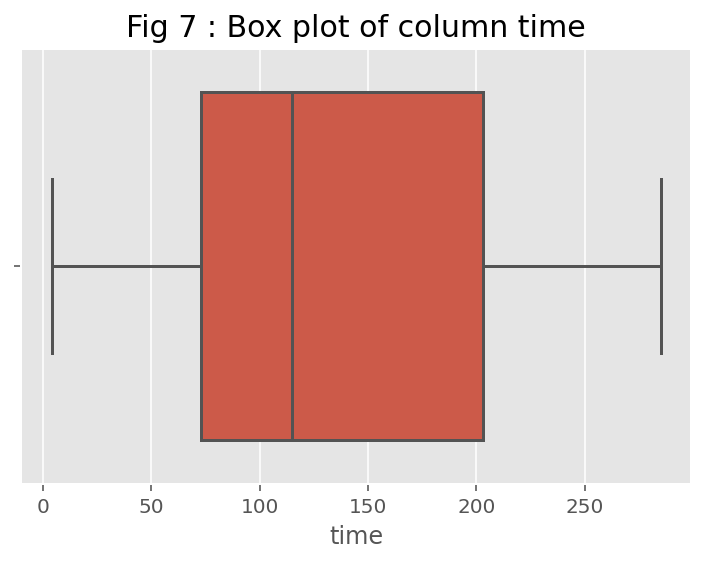

In [11]:
# Columns to check outliers on
columns = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']

i = 0
# Check outliers using boxplot
for col in columns:
    i = i + 1
    print(col)
    sns.boxplot(heart_fail_df[col]).set_title('Fig '+ str(i) + ' : Box plot of column ' + col, fontsize = 15)
    plt.show();


Except for `age` and `time`, all attributes are showing outliers. <br />
These outliers can be correct value and not an error. As the knowledge is limited in this domain, no action will be taken to deal with the outliers.<br />


## Clean Data

In this part, we will check the clean data which will be used by 'Data Exploration' and 'Data Modelling' sections.

In [12]:
# Check the shape, data types and top 5 header rows of the clean dataframe
print('Clean dataframe shape is', heart_fail_df.shape)
print('\n\nClean dataframe datatypes is\n', heart_fail_df.dtypes)
print('\n Clean dataframe top 5 rows are')
heart_fail_df.head(5)

Clean dataframe shape is (299, 13)


Clean dataframe datatypes is
 age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

 Clean dataframe top 5 rows are


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


***
# Task 2: Data Exploration
***

Data is cleaned and ready for exploration. In this section, data will be visualised. <br />
In order to get upmost clarity while visualising, boolean and binary attributes (i.e., with 2 unique values) will be updated to more informative values based on details provided in the UCI site. <br />

New data frame `heart_fail_exp_df` will be copied from clean data frame `heart_fail_df`. This is to avoid reverting this change for data modelling section which requires only numerical value.

In [13]:
heart_fail_exp_df = heart_fail_df.copy()
heart_fail_exp_df['anaemia'] = heart_fail_exp_df['anaemia'].replace({0 : 'no', 1 : 'yes'})
heart_fail_exp_df['diabetes'] = heart_fail_exp_df['diabetes'].replace({0 : 'no', 1 : 'yes'})
heart_fail_exp_df['high_blood_pressure'] = heart_fail_exp_df['high_blood_pressure'].replace({0 : 'no', 1 : 'yes'})
heart_fail_exp_df['smoking'] = heart_fail_exp_df['smoking'].replace({0 : 'no', 1 : 'yes'})
heart_fail_exp_df['sex'] = heart_fail_exp_df['sex'].replace({0 : 'female', 1 : 'male'})
heart_fail_exp_df['DEATH_EVENT'] = heart_fail_exp_df['DEATH_EVENT'].replace({0 : 'alive', 1 : 'dead'})

## Univariate Visualisation

### 1 - sex attribute

Descriptive statistics of `sex` attribute.

In [14]:
heart_fail_exp_df['sex'].describe()

count      299
unique       2
top       male
freq       194
Name: sex, dtype: object

Bar chart visualisation of `sex` attribute.

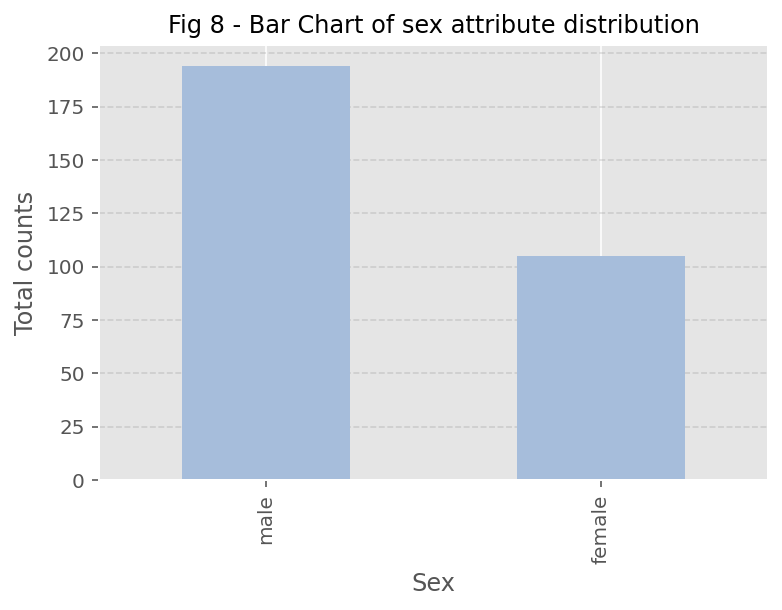

In [15]:
heart_fail_exp_df['sex'].value_counts().plot(kind="bar", color='#a6bddb')
plt.title('Fig 8 - Bar Chart of sex attribute distribution', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.ylabel('Total counts', fontsize = 12)
plt.grid(color='grey', linestyle='--', axis='y', alpha=0.25)

<b>Observation</b> - Fig 8 shows that males are twice as likely to have heart failures than females.

### 2 - anaemia attribute

Descriptive statistics of `anaemia` attribute.

In [16]:
heart_fail_exp_df['anaemia'].describe()

count     299
unique      2
top        no
freq      170
Name: anaemia, dtype: object

Bar chart visualisation of `anaemia` attribute.

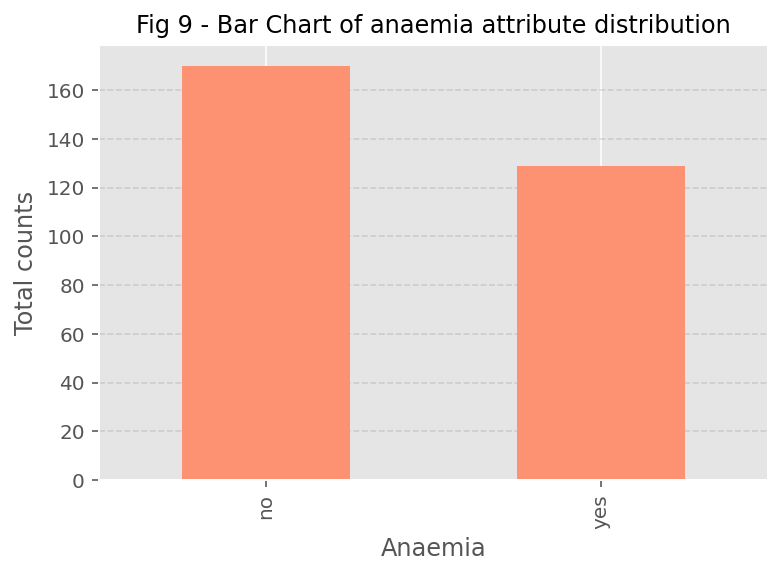

In [17]:
heart_fail_exp_df['anaemia'].value_counts().plot(kind="bar", color = '#fc9272')
plt.title('Fig 9 - Bar Chart of anaemia attribute distribution', fontsize = 12)
plt.xlabel('Anaemia', fontsize = 12)
plt.ylabel('Total counts', fontsize = 12)
plt.grid(color='grey', linestyle='--', axis='y', alpha=0.25)

<b>Observation</b> - Out of 299 rows, there are 129 patients with anaemia in this dataset. 

### 3 - diabetes attribute

Descriptive statistics of `diabetes` attribute.

In [18]:
heart_fail_exp_df['diabetes'].describe()

count     299
unique      2
top        no
freq      174
Name: diabetes, dtype: object

Bar chart visualisation of `diabetes` attribute.

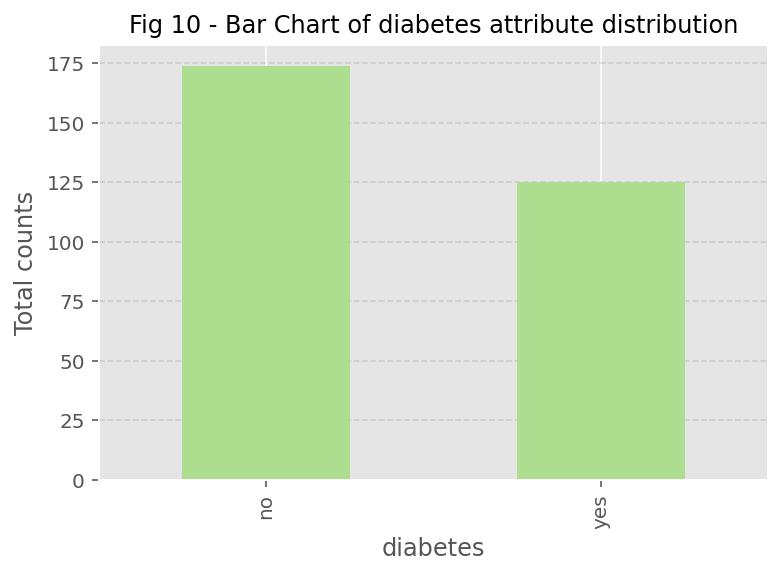

In [19]:
heart_fail_exp_df['diabetes'].value_counts().plot(kind="bar", color='#addd8e')
plt.title('Fig 10 - Bar Chart of diabetes attribute distribution', fontsize = 12)
plt.xlabel('diabetes', fontsize = 12)
plt.ylabel('Total counts', fontsize = 12)
plt.grid(color='grey', linestyle='--', axis='y', alpha=0.25)

<b>Observation</b> - Out of 299 rows, there are 125 diabetic patients in this dataset.

### 4 - high_blood_pressure attribute

Descriptive statistics of `high_blood_pressure` attribute.

In [20]:
heart_fail_exp_df['high_blood_pressure'].describe()

count     299
unique      2
top        no
freq      194
Name: high_blood_pressure, dtype: object

Bar chart visualisation of `high_blood_pressure` attribute.

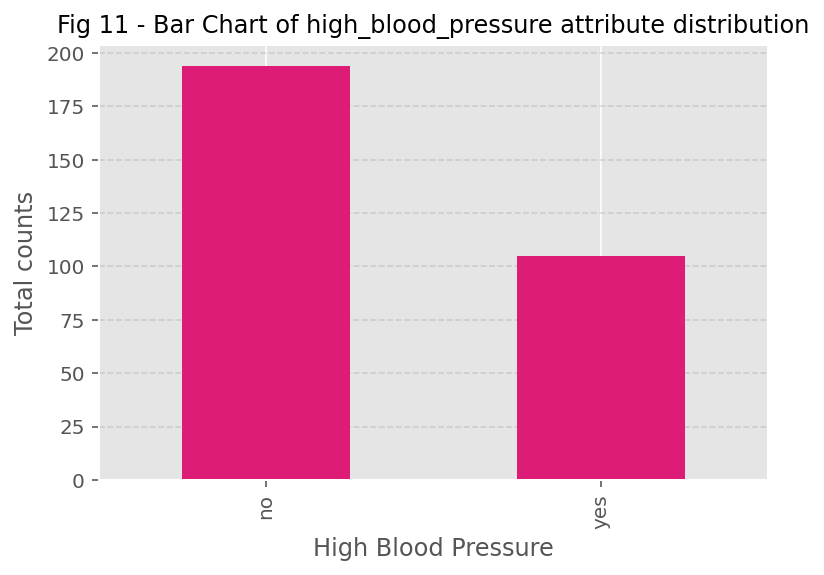

In [21]:
heart_fail_exp_df['high_blood_pressure'].value_counts().plot(kind="bar", color='#dd1c77')
plt.title('Fig 11 - Bar Chart of high_blood_pressure attribute distribution', fontsize = 12)
plt.xlabel('High Blood Pressure', fontsize = 12)
plt.ylabel('Total counts', fontsize = 12)
plt.grid(color='grey', linestyle='--', axis='y', alpha=0.25)

<b>Observation</b> - Approximately one third of the heart failure patients in the dataset has high blood pressure.

### 5 - smoking attribute

Descriptive statistics of `smoking` attribute.

In [22]:
heart_fail_exp_df['smoking'].describe()

count     299
unique      2
top        no
freq      203
Name: smoking, dtype: object

Bar chart visualisation of `smoking` attribute.

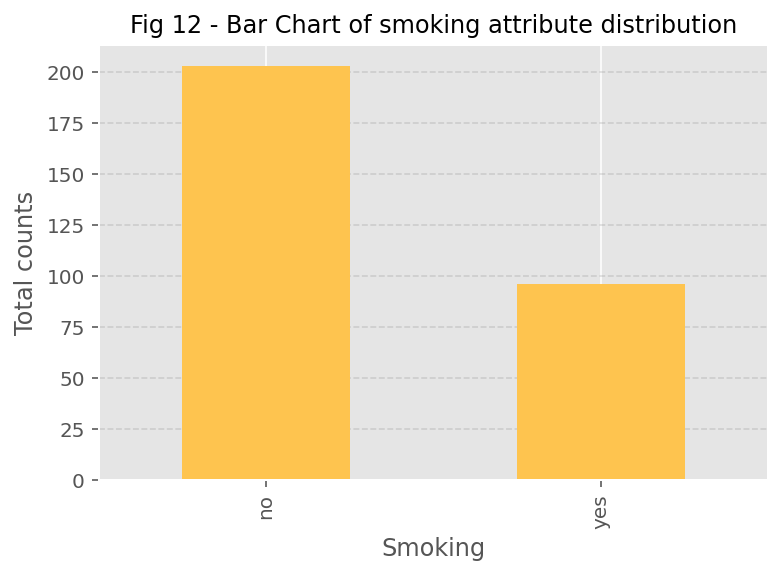

In [23]:
heart_fail_exp_df['smoking'].value_counts().plot(kind="bar", color='#fec44f')
plt.title('Fig 12 - Bar Chart of smoking attribute distribution', fontsize = 12)
plt.xlabel('Smoking', fontsize = 12)
plt.ylabel('Total counts', fontsize = 12)
plt.grid(color='grey', linestyle='--', axis='y', alpha=0.25)

<b>Observation</b> - Less than one third of the heart failure patients in the dataset are smokers.

### 6 - DEATH_EVENT attribute

Descriptive statistics of `DEATH_EVENT`(target) attribute.

In [24]:
heart_fail_exp_df['DEATH_EVENT'].describe()

count       299
unique        2
top       alive
freq        203
Name: DEATH_EVENT, dtype: object

Pie chart visualisation of `DEATH_EVENT` attribute.

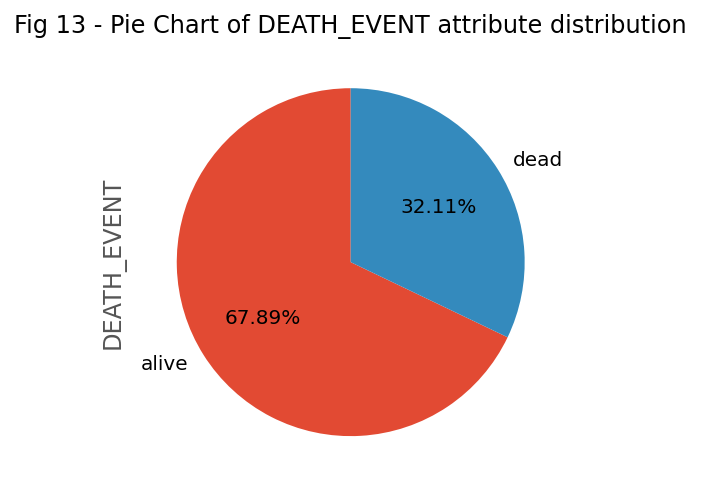

In [25]:
heart_fail_exp_df['DEATH_EVENT'].value_counts().plot(kind="pie",autopct='%.2f%%', startangle=90)
plt.title('Fig 13 - Pie Chart of DEATH_EVENT attribute distribution', fontsize = 12)
plt.grid(color='grey', linestyle='--', axis='y', alpha=0.25)

<b>Observation</b> - 32.11% heart failure patients in the observation are dead. Our target attribute is unbalanced and shows more alive(67.89%) patients record.

### 7 - age attribute

Descriptive statistics of `age` attribute.

In [26]:
heart_fail_exp_df['age'].describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Histogram visualisation of `age` attribute.

Text(0.5, 0, 'Age')

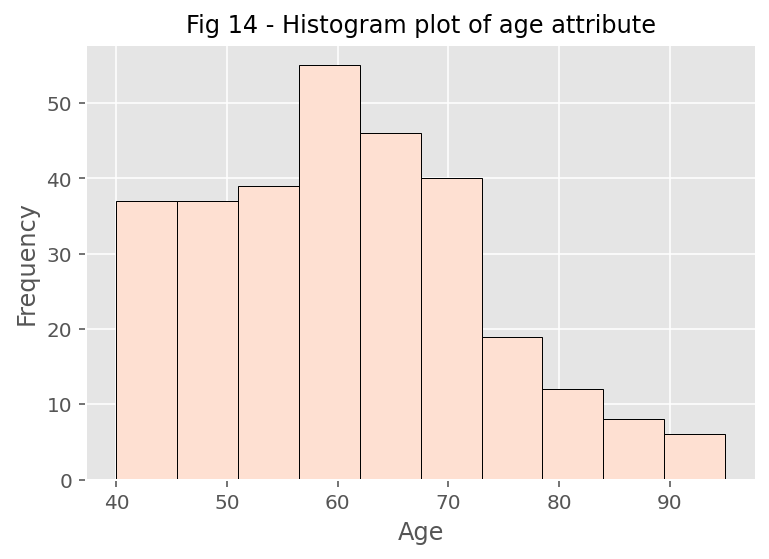

In [27]:
heart_fail_exp_df['age'].plot(kind="hist", color = '#fee0d2', edgecolor='black', linewidth=0.5)
plt.title('Fig 14 - Histogram plot of age attribute', fontsize = 12)
plt.xlabel('Age', fontsize = 12)

<b>Observation</b> - Dataset has heart failure patients between age 40 and 95. Fig 14 shows distribution is right-skewed.

### 8 - time attribute

Descriptive statistics of `time` attribute.

In [28]:
heart_fail_exp_df['time'].describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

Boxplot visualisation of `time` attribute.

Text(0.5, 1.0, 'Fig 15 - Boxplot of time attribute')

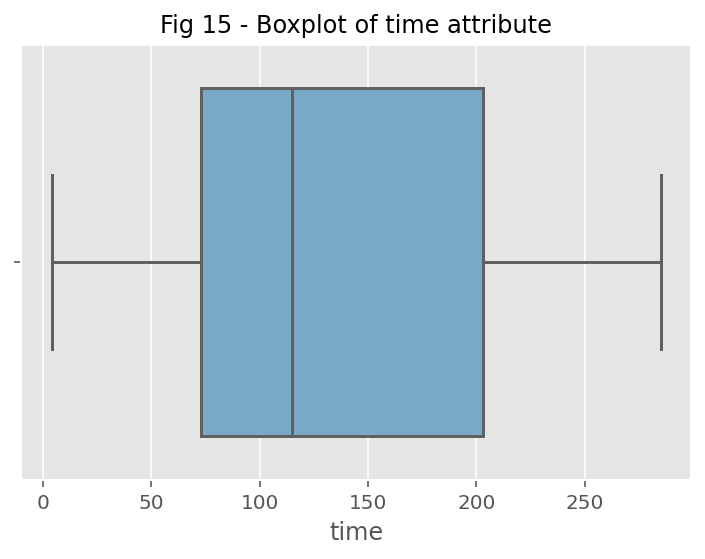

In [29]:
sns.boxplot(heart_fail_df['time'], palette="Blues").set_title('Fig 15 - Boxplot of time attribute', fontsize = 12)

<b>Observation</b> - Dataset has heart failure patients with follow up time between 4 and 285. Median value is 115 and dataset has no outliers based on Fig 15.

### 9 - ejection_fraction attribute

Descriptive statistics of `ejection_fraction` attribute.

In [30]:
heart_fail_exp_df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Histogram visualisation of `ejection_fraction` attribute.

Text(0.5, 0, 'Ejection Fraction Percentage')

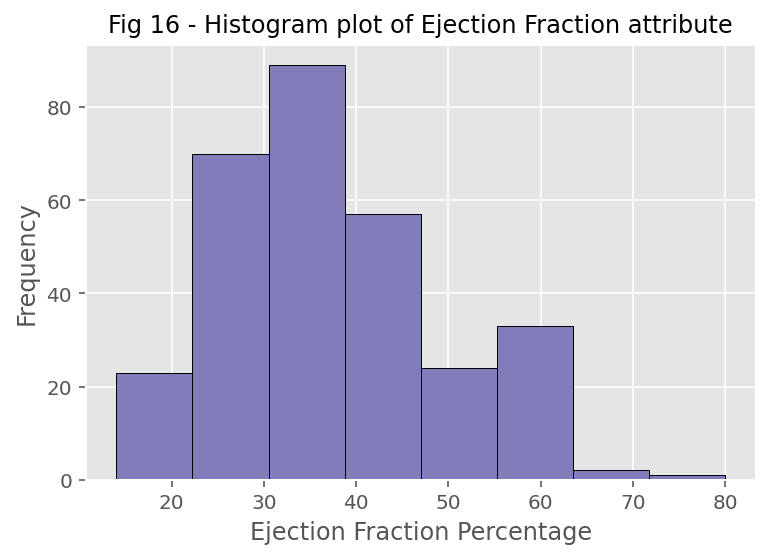

In [31]:
heart_fail_exp_df['ejection_fraction'].plot(kind="hist", bins=8, color = '#807dba', edgecolor='black', linewidth=0.5)
plt.title('Fig 16 - Histogram plot of Ejection Fraction attribute', fontsize = 12)
plt.xlabel('Ejection Fraction Percentage', fontsize = 12)

<b>Observation</b> - Dataset has heart failure patients with ejection fraction ranging between 14 and 80. Fig 16 shows distribution is right skewed and not normally distributed.

### 10 - serum_sodium attribute

Descriptive statistics of `serum_sodium` attribute.

In [32]:
heart_fail_exp_df['serum_sodium'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Histogram visualisation of `serum_sodium` attribute.

Text(0.5, 0, 'Serum Sodium in blood')

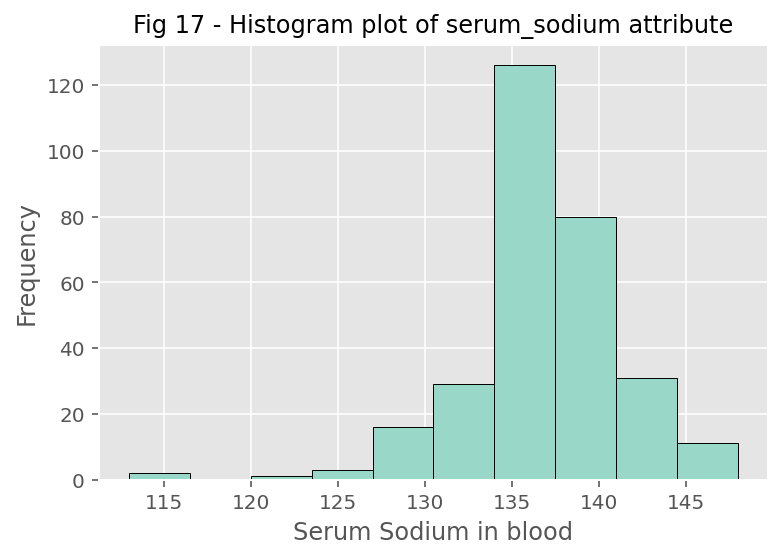

In [33]:
heart_fail_exp_df['serum_sodium'].plot(kind="hist", color = '#99d8c9', edgecolor='black', linewidth=0.5)
plt.title('Fig 17 - Histogram plot of serum_sodium attribute', fontsize = 12)
plt.xlabel('Serum Sodium in blood', fontsize = 12)

<b>Observation</b> - Dataset has heart failure patients with serum sodium ranging between 113 and 148. Fig 17 shows distribution is left skewed and not normally distributed.

## Univariate visualisation

In this section, relationship between 10 pair of attributes will be checked.

### 1 - Analysing relationship between `age` and `high_blood_pressure` attributes

Hypothesis - Chances of high blood pressure in older heart failure patients is higher than younger patients.

Text(0.5, 1.0, 'Fig 18 - Boxplot of age by high_blood_pressure')

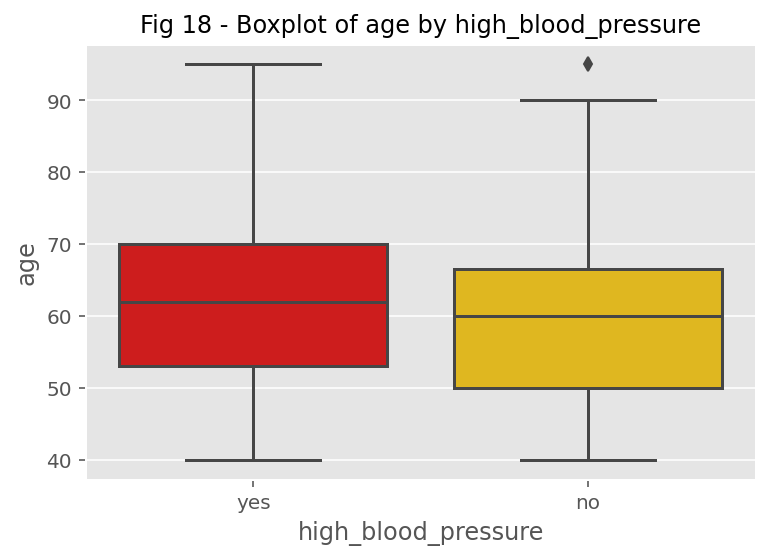

In [34]:
sns.boxplot(x=heart_fail_exp_df["high_blood_pressure"], y=heart_fail_exp_df["age"]
            , palette="hot").set_title('Fig 18 - Boxplot of age by high_blood_pressure', fontsize = 12)

<b>Observation</b> - Fig 18 shows that older age patients are more likely to have high blood pressure. However, the significance is not too much. Median age of heart failure patients with high blood pressure is about 62 years whereas for patients without high blood pressure is 60 years.

### 2 - Analysing relationship between `age` and `smoking` attributes

Hypothesis - There is no relationship between smoking and age.

Text(0.5, 1.0, 'Fig 19 - Boxplot of age by smoking')

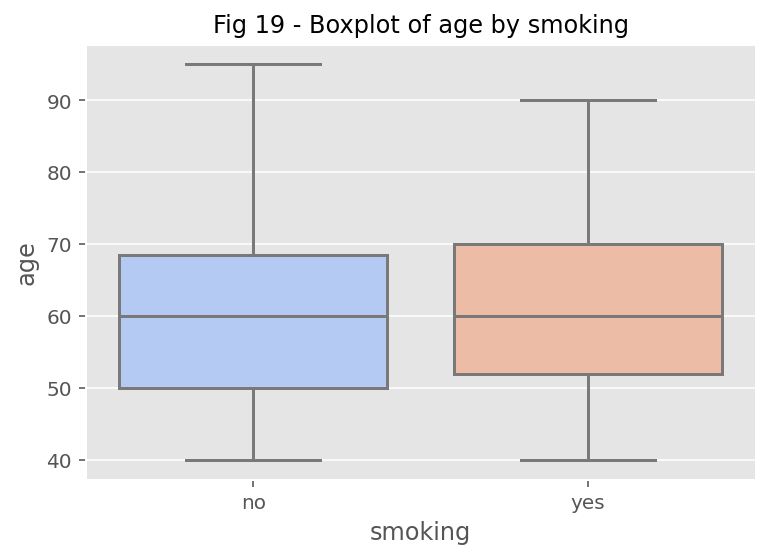

In [35]:
sns.boxplot(x=heart_fail_exp_df["smoking"], y=heart_fail_exp_df["age"]
            , palette="coolwarm").set_title('Fig 19 - Boxplot of age by smoking', fontsize = 12)

<b>Observation</b> - Fig 19 shows no relationship between smoking and age in heart failure patients. Both smokers and non-smokers have similar boxplot distributions.

### 3 - Analysing relationship between `age` and `DEATH_EVENT` attributes

Hypothesis - Heart failure patients are at more risk of dying if they are older.

Text(0.5, 1.0, 'Fig 20 - Boxplot of age by DEATH_EVENT')

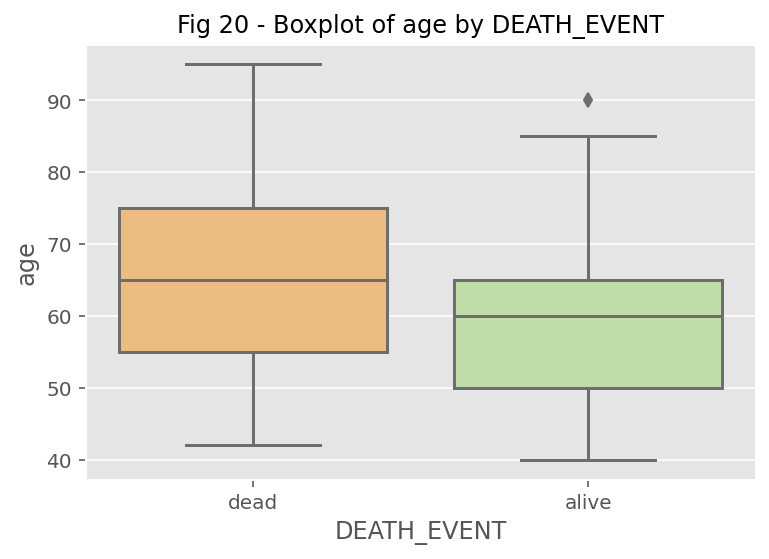

In [36]:
sns.boxplot(x=heart_fail_exp_df["DEATH_EVENT"], y=heart_fail_exp_df["age"]
            , palette="Spectral").set_title('Fig 20 - Boxplot of age by DEATH_EVENT', fontsize = 12)

<b>Observation</b> - Fig 20 shows that median age of dead patients is around 65 years whereas for alive patient is around 60 years. This proves our stated hypothesis.

### 4 - Analysing relationship between `DEATH_EVENT` and `high_blood_pressure` attributes.

Hypothesis - Heart failure patients with high blood pressure are at high risk to die than patients without high blood pressure.

Text(0.5, 1.0, 'Fig 21 - Countplot of DEATH_EVENT by high_blood_pressure')

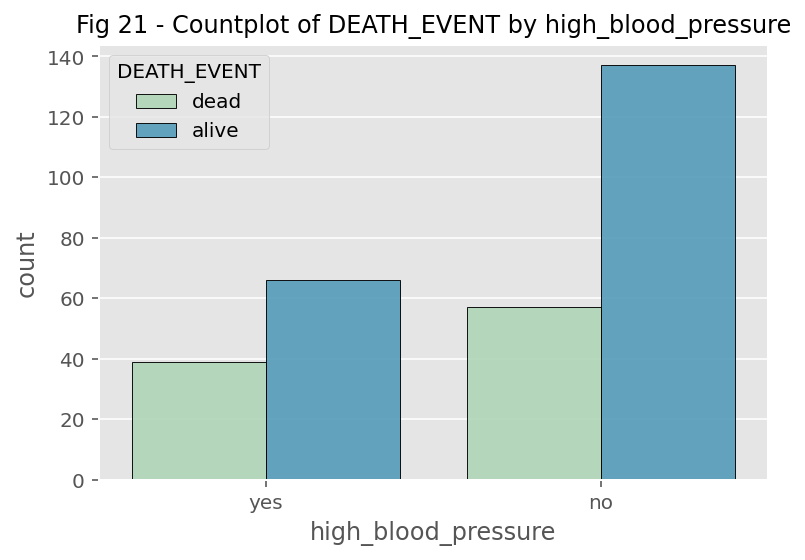

In [37]:
sns.countplot(data=heart_fail_exp_df, x='high_blood_pressure'
              , hue="DEATH_EVENT", palette = ["#a8ddb5", "#43a2ca"]
              , alpha=0.9, edgecolor="k"
              , linewidth=0.5).set_title('Fig 21 - Countplot of DEATH_EVENT by high_blood_pressure'
                                         , fontsize = 12)

<b>Observation</b> - Fig 21 shows that patients with high blood pressure has more chance of being dead than patients without high blood pressure.

### 5 - Analysing relationship between DEATH_EVENT and anaemia attributes

Hypothesis - Heart failure patients with anaemia are more likely to die than patient with no anaemia.

Text(0.5, 1.0, 'Fig 22 - Countplot of DEATH_EVENT by anaemia')

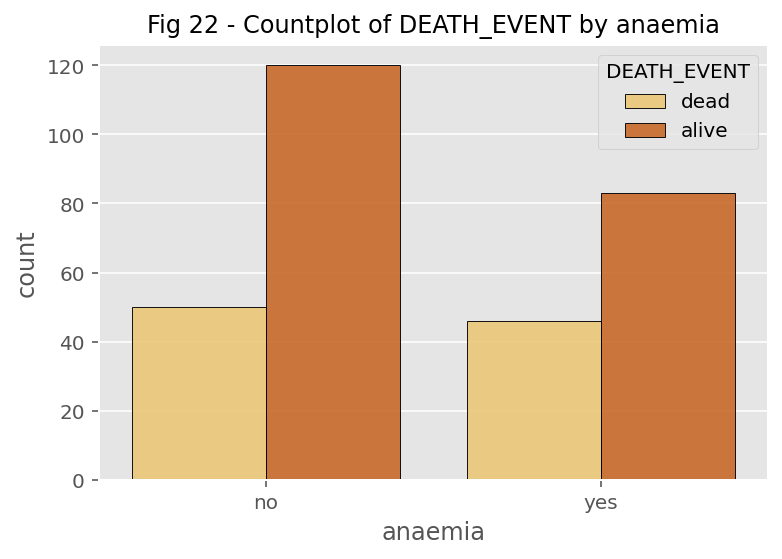

In [38]:
sns.countplot(data=heart_fail_exp_df, x='anaemia'
              , hue="DEATH_EVENT"
              , palette = "YlOrBr"
              , alpha=0.9, edgecolor="k"
              , linewidth=0.5).set_title('Fig 22 - Countplot of DEATH_EVENT by anaemia'
                                         , fontsize = 12)

<b>Observation</b> - Fig 22 shows that 1 out of 3 patients with anaemia dies. Patients with no anaemia has more chances of being alive. So, this proves our hypothesis.

### 6 - Analysing relationship between DEATH_EVENT and diabetes attributes

Hypothesis – Heart failure patients with diabetes are more likely to die than patients with no diabetes.

Text(0.5, 1.0, 'Fig 23 - Countplot of DEATH_EVENT by diabetes')

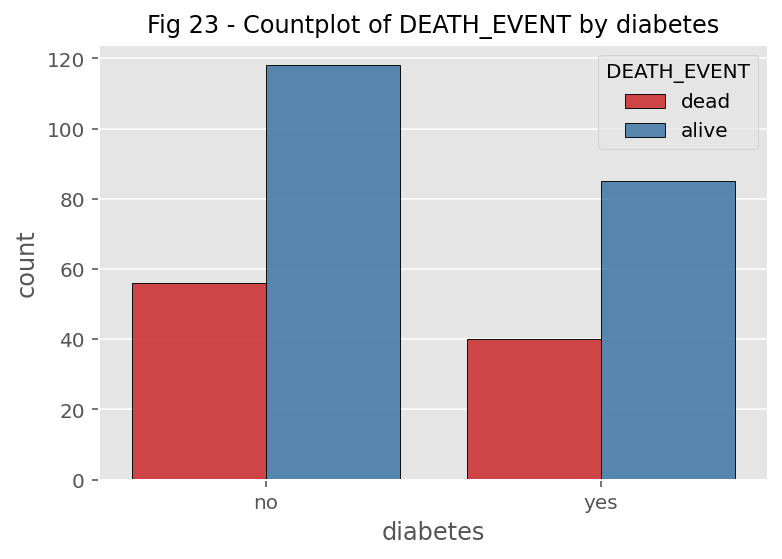

In [39]:
sns.countplot(data=heart_fail_exp_df, x='diabetes'
              , hue="DEATH_EVENT"
              , palette = "Set1"
              , alpha=0.9, edgecolor="k"
              , linewidth=0.5).set_title('Fig 23 - Countplot of DEATH_EVENT by diabetes'
                                         , fontsize = 12)

<b>Observation</b> - Fig 23 shows there is no relationship between death event and diabetes.

### 7 - Analysing relationship between diabetes and sex attributes

Hypothesis - There is no relationship between sex and diabetes for heart failure patients.

Text(0.5, 1.0, 'Fig 24 - Countplot of diabetes by sex')

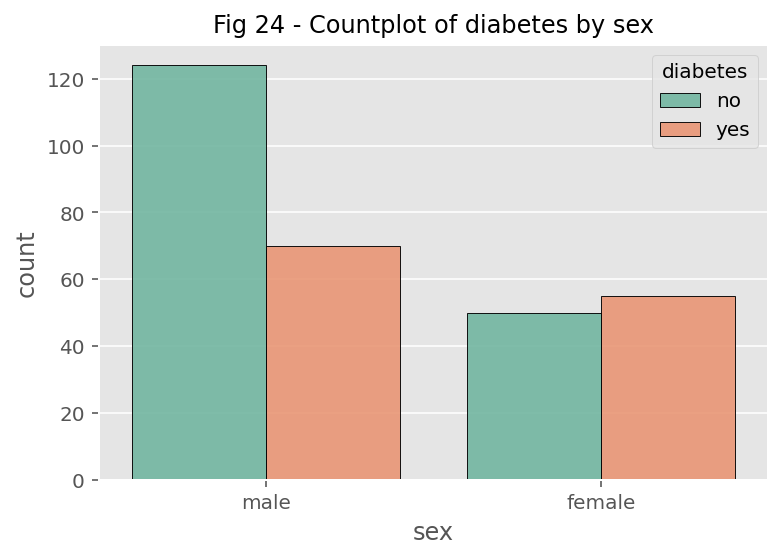

In [40]:
sns.countplot(data=heart_fail_exp_df, x='sex'
              , hue="diabetes"
              , palette = "Set2"
              , alpha=0.9, edgecolor="k"
              , linewidth=0.5).set_title('Fig 24 - Countplot of diabetes by sex'
                                         , fontsize = 12)

<b>Observation</b> - Fig 24 shows two third of males are non-diabetic and one third of males are diabetic. However, in females, the ratio is almost 1 to 1. Since the ratios are not same, there seems to be relationship between sex and diabetes in the patients. Based on this evidence, our stated hypothesis cannot be proved.

### 8 - Analysing relationship between high_blood_pressure and anaemia attributes

Hypothesis - There is no relationship between high blood pressure and anaemia for heart failure patients.

Text(0.5, 1.0, 'Fig 25 - Countplot of anaemia by high_blood_pressure')

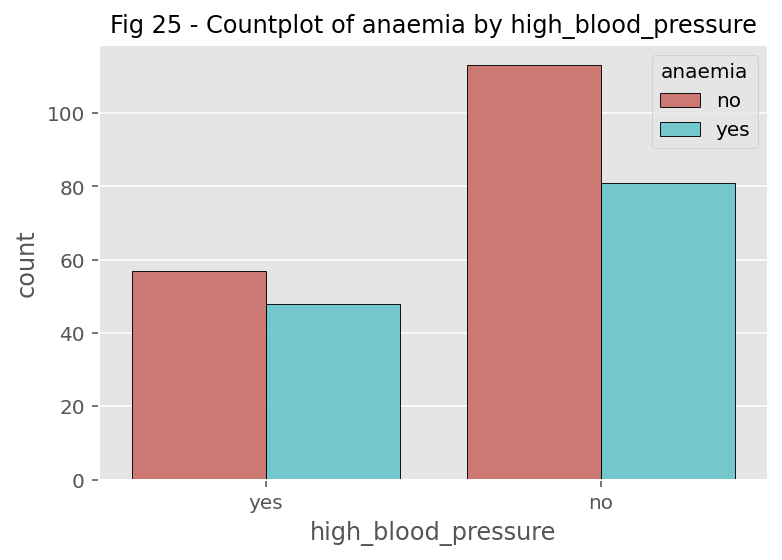

In [41]:
sns.countplot(data=heart_fail_exp_df, x='high_blood_pressure'
              , hue="anaemia"
              , palette = "hls"
              , alpha=0.9, edgecolor="k"
              , linewidth=0.5).set_title('Fig 25 - Countplot of anaemia by high_blood_pressure'
                                         , fontsize = 12)

<b>Observation</b> - Fig 25 shows that heart failure patients with high blood pressure are more likely to have anaemia. So, alternate hypothesis is correct in this case.

### 9 - Analysing relationship between age and platelets attributes

Hypothesis - There is no relationship between age and platelets for heart failure patients.

Text(0.5, 1.0, 'Fig 26 - Scatter plot of age and platelets attributes')

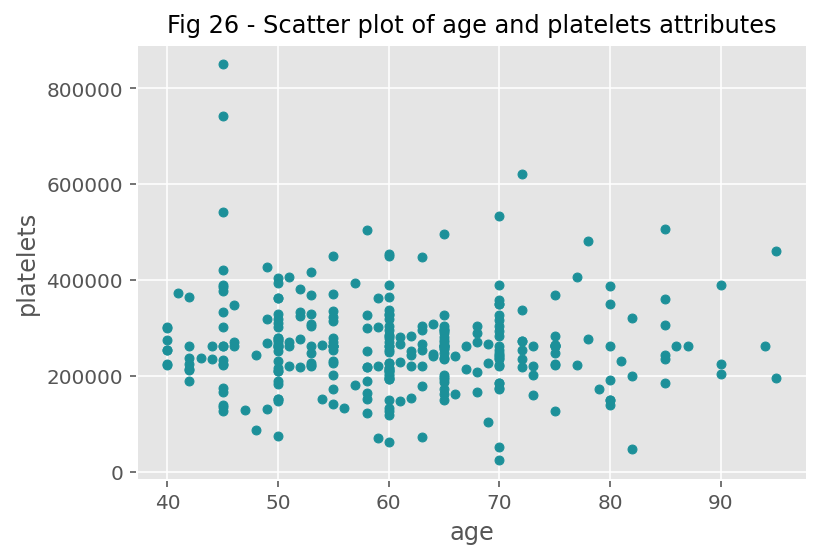

In [42]:
heart_fail_exp_df.plot(kind='scatter', x='age', y='platelets', color='#1c9099')
plt.title('Fig 26 - Scatter plot of age and platelets attributes', fontsize = 12)

<b>Observation</b> - Fig 26 shows that age and platelets are not correlated which proves our hypothesis.

### 10 - Analysing relationship between serum_sodium and serum_creatinine attributes

Hypothesis - Serum sodium and serum creatinine are correlated.

Text(0.5, 1.0, 'Fig 27 - Scatter plot of serum_sodium and serum_creatinine attributes')

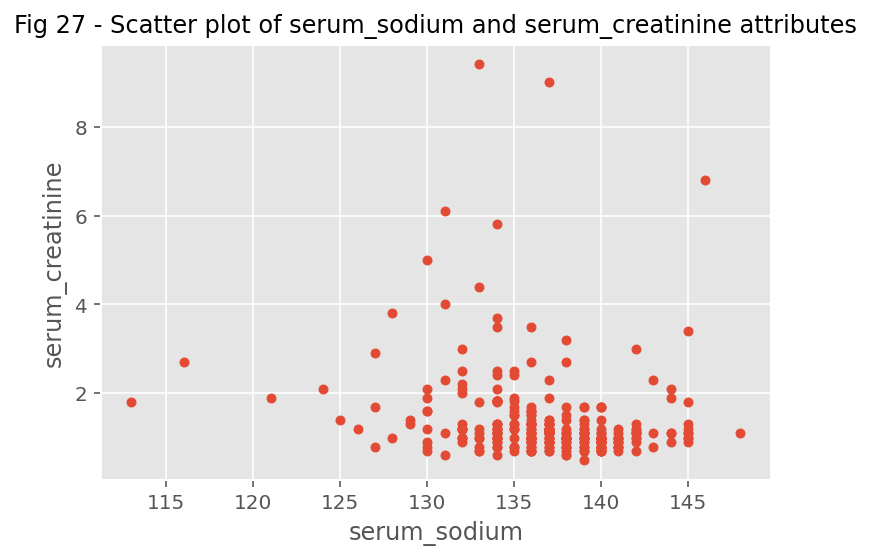

In [43]:
heart_fail_exp_df.plot(kind='scatter', x='serum_sodium', y='serum_creatinine', color='#e34a33')
plt.title('Fig 27 - Scatter plot of serum_sodium and serum_creatinine attributes', fontsize = 12)

<b>Observation</b> - Fig 27 shows that serum sodium and serum creatinine are not correlated.


<br />
<br />
<br />

***
# Task 3: Data Modelling
***

In this section, using Decision Tree and KNN classifications, best model will be identified. Best model will then be trained on hill climbing feature selection to get the best features and improve its metric score further.

## Descriptive features and target feature
Split the dataframe into descriptive features and target.<br />
Both are converted into numpy array as sklearn libraries used for data modelling for training and testing the dataset works best with numpy array.

In [44]:
# Descriptive features 
Data = heart_fail_df.drop(columns = 'DEATH_EVENT').values
# Target feature 
target = heart_fail_df['DEATH_EVENT'].values

print('Data is\n')
print(Data)
print('\n\nData shape is\n')
print(Data.shape)
print('\nTarget is\n')
print(target)
print('\nTarget shape is\n')
print(target.shape)
print('\nTarget value counts\n')
print(np.unique(target, return_counts=True))

Data is

[[7.500e+01 0.000e+00 5.820e+02 ... 1.000e+00 0.000e+00 4.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 1.000e+00 0.000e+00 6.000e+00]
 [6.500e+01 0.000e+00 1.460e+02 ... 1.000e+00 1.000e+00 7.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 0.000e+00 2.780e+02]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 1.000e+00 2.800e+02]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 1.000e+00 2.850e+02]]


Data shape is

(299, 12)

Target is

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 

The above output shows that data has been successfully converted and there are 12 descriptive features and 299 rows.
Target is unbalanced with 203 rows for 0 value and 96 rows for 1 value. <br />
This information needs to be taken into account for model analysis.

## Train/Test data
Use 60% of dataset for training and 40% for testing.<br />
In order to avoid different data selection for training and testing when the script is re-run, random state is assigned. It is set to 0.

In [45]:
# Import the train/test split libraries
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data,target,test_size=0.4,random_state=0)

`X_train` is training data. <br />
`X_test` is training target. <br />
`y_train` is testing data. <br />
`y_test` is testing target. <br /><br />

Check X_train data.

In [46]:
X_train

array([[ 82.,   0.,  70., ...,   1.,   1.,  26.],
       [ 52.,   0., 132., ...,   1.,   1., 112.],
       [ 87.,   1., 149., ...,   1.,   0.,  14.],
       ...,
       [ 85.,   1., 102., ...,   0.,   0.,  94.],
       [ 60.,   0., 582., ...,   1.,   1.,  40.],
       [ 70.,   1., 171., ...,   1.,   1., 146.]])

Check X_train shape.

In [47]:
X_train.shape

(179, 12)

Check X_test data.

In [48]:
X_test

array([[ 40.,   1., 101., ...,   0.,   0., 187.],
       [ 60.,   1., 151., ...,   0.,   0., 172.],
       [ 45.,   1., 981., ...,   1.,   0.,  11.],
       ...,
       [ 55.,   0.,  84., ...,   0.,   0., 246.],
       [ 85.,   0., 129., ...,   1.,   1.,  90.],
       [ 65.,   1., 128., ...,   0.,   0.,  20.]])

Check X_test shape.

In [49]:
X_test.shape

(120, 12)

Check y_train data.

In [50]:
y_train

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

Check y_train  shape.

In [51]:
y_train.shape

(179,)

Check y_test data.

In [52]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

Check y_test shape.

In [53]:
y_test.shape

(120,)

As it was identified, target value classified are not evenly distributed. <br />
Let's also check whether the target ratio between training and testing is same or not.

In [54]:
from collections import Counter
print(Counter(y_train))
print()
print(Counter(y_test))

Counter({0: 121, 1: 58})

Counter({0: 82, 1: 38})


Ratio in y_train and y_test looks even.

## KNN Classifier

Training and testing the model using KNN classifier.
As hyper-tuning is out-of-scope for our analysis, this will be done by tuning each parameters manually to find the optimal model.<br />
Approach will be to check one parameter at a time. Though, it is not an ideal approach but it will give better results with lesser permutation than testing each model manually.<br />

To avoid repeating steps, function clf_knn is created which will output both confusion matrix and classification report of passed parameters. 

We will use true positive, true negative, precision, recall, f1-score and accuracy to identify best model.
For such model, it is important to identify 'dead' patient than 'alive' patient. So, our main focus will be on true negative and dead classification metric value. 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def clf_knn(_n, _w, _p):
    clf = KNeighborsClassifier(_n, weights=_w, p=_p)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    print('\nConfusion matrix\n\n')
    print(confusion_matrix(y_test, y_pre))
    print('\nClassification report\n')
    print(classification_report(y_test,y_pre))

### KNN model 1 
Model parameter: <br />
N neighbours - 5<br />
Weights - Uniform<br />
P - 2 (Euclidean distance)<br />

This is also the default parameters of KNN classifier.

In [56]:
clf_knn(5, 'uniform', 2)


Confusion matrix


[[59 23]
 [27 11]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        82
           1       0.32      0.29      0.31        38

    accuracy                           0.58       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.57      0.58      0.58       120



The result will be compared with the other models after parameters are fine tuned.<br />

Fine tuning will be first done on N neighbours parameter. Other parameter will not be changed. <br />

### KNN model 2
Model parameter: <br />
N neighbours - 7 <br />
Weights - Uniform <br />
P - 2 (Euclidean distance) <br />

In [57]:
clf_knn(7, 'uniform', 2)


Confusion matrix


[[60 22]
 [27 11]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        82
           1       0.33      0.29      0.31        38

    accuracy                           0.59       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.58      0.59      0.58       120



Compare to KNN model 1, KNN model 2 is either same or better in all the metrics. 

<b>Best model (so far)</b> : KNN model 2

### KNN model 3
Model parameter: <br />
N neighbours - 9 <br />
Weights - Uniform <br />
P - 2 (Euclidean distance) <br />

In [58]:
clf_knn(9, 'uniform', 2)


Confusion matrix


[[63 19]
 [32  6]]

Classification report

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        82
           1       0.24      0.16      0.19        38

    accuracy                           0.57       120
   macro avg       0.45      0.46      0.45       120
weighted avg       0.53      0.57      0.55       120



Compare to the best model KNN model 2, KNN model 3 has slightly better true positive values. However, true negative and classification 1 metric values are better for KNN model 2 by a big margin comparatively. 

<b>Best model (so far)</b> : KNN model 2

### KNN model 4
Model parameter: <br />
N neighbours - 11 <br />
Weights - Uniform <br />
P - 2 (Euclidean distance) <br />

In [59]:
clf_knn(11, 'uniform', 2)


Confusion matrix


[[70 12]
 [33  5]]

Classification report

              precision    recall  f1-score   support

           0       0.68      0.85      0.76        82
           1       0.29      0.13      0.18        38

    accuracy                           0.62       120
   macro avg       0.49      0.49      0.47       120
weighted avg       0.56      0.62      0.57       120



Compare to the best model KNN model 2, KNN model 4 has better true positive values. However, true negative and classification 1 metric values are better for KNN model 2 by a big margin comparatively.

<b>Best model (so far)</b> : KNN model 2


Increasing N neighbors is not improving the model, we will try decreasing it.

### KNN model 5

Model parameter: <br />
N neighbours - 3<br />
Weights - Uniform<br />
P - 2 (Euclidean distance)

In [60]:
clf_knn(3, 'uniform', 2)


Confusion matrix


[[55 27]
 [31  7]]

Classification report

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        82
           1       0.21      0.18      0.19        38

    accuracy                           0.52       120
   macro avg       0.42      0.43      0.42       120
weighted avg       0.50      0.52      0.51       120



Compare to the best model KNN model 2, all metrics score in KNN model 5 are lower.

<b>Best model (so far)</b> : KNN model 2


Decreasing N neighbor value too is not improving the model, so it is best to assume that N neighbors - 7 is best parameter. Now, we will tune weights parameter. It can have two posible values 'uniform' and 'distance'. 'uniform' is already tested, so we will test 'distance'

### KNN model 6

Model parameter: <br />
N neighbours - 7<br />
Weights - distance<br />
P - 2 (Euclidean distance)

In [61]:
clf_knn(7, 'distance', 2)


Confusion matrix


[[54 28]
 [28 10]]

Classification report

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        82
           1       0.26      0.26      0.26        38

    accuracy                           0.53       120
   macro avg       0.46      0.46      0.46       120
weighted avg       0.53      0.53      0.53       120



Compare to the best model KNN model 2, all metrics score in KNN model 6 are lower.

<b>Best model (so far)</b> : KNN model 2

After testing both possible weights parameter, 'uniform' gave better result. So, it is consider as best weights parameter for this dataset. Now, we will fine tune p value. 

### KNN model 7

Model parameter: <br />
N neighbours - 7<br />
Weights - uniform<br />
P - 1 (Manhattan distance) 

In [62]:
clf_knn(7, 'uniform', 1)


Confusion matrix


[[60 22]
 [27 11]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        82
           1       0.33      0.29      0.31        38

    accuracy                           0.59       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.58      0.59      0.58       120



Compare to best model KNN model 2, KNN model 7 is giving exactly the same confusion matrix and classification report. So, both manhattan and euclidean distance is giving same result. We will try minkowski to see if it improves any further.

<b>Best model (so far)</b> : KNN model 2/KNN model 7

### KNN model 8

Model parameter: <br />
N neighbours - 7<br />
Weights - uniform<br />
P - 3(Minkowski distance) 

In [63]:
clf_knn(7, 'uniform', 3)


Confusion matrix


[[60 22]
 [27 11]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        82
           1       0.33      0.29      0.31        38

    accuracy                           0.59       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.58      0.59      0.58       120



Compare to best model KNN model 2 and KNN model 7, KNN model 8 is giving exactly the same confusion matrix and classification report. 

<b>Best model (so far)</b> : KNN model 2/KNN model 7/KNN model 8

### KNN model 9

Model parameter: <br />
N neighbours - 7<br />
Weights - uniform<br />
P - 5(Minkowski distance) 

In [64]:
clf_knn(7, 'uniform', 5)


Confusion matrix


[[61 21]
 [27 11]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        82
           1       0.34      0.29      0.31        38

    accuracy                           0.60       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.58      0.60      0.59       120



Compare to best model, KNN model 9 is giving slightly better true positive value. In other metrics score, it is either same or better. Based on this, KNN model 9 is best model so far.

<b>Best model (so far)</b> : KNN model 9

### KNN model 10

Model parameter: <br />
N neighbours - 7<br />
Weights - uniform<br />
P - 9(Minkowski distance) 

In [65]:
clf_knn(7, 'uniform', 9)


Confusion matrix


[[60 22]
 [27 11]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        82
           1       0.33      0.29      0.31        38

    accuracy                           0.59       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.58      0.59      0.58       120



KNN model 10 output is similar to KNN model 2. 

<b>Best model (so far)</b> : KNN model 9

Let's try with even higher p value to see if it improves.

### KNN model 11

Model parameter: <br />
N neighbours - 7<br />
Weights - uniform<br />
P - 15(Minkowski distance) 

In [66]:
clf_knn(7, 'uniform', 15)


Confusion matrix


[[61 21]
 [28 10]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        82
           1       0.32      0.26      0.29        38

    accuracy                           0.59       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.57      0.59      0.58       120



Compare to best model KNN model 9, KNN model 11 shows no improvement. It has lower true negative in confusion matrix and in classification report, all metrics are slightly lower. 

This signifies that p value '5' is best parameter.

Best model for KNN classifier is: <br />
N neighbor - 7<br />
weights - uniform<br />
p - 15 (minkowski distance)<br />

Now, same analysis will be done in Decision tree classifier.<br />


## Decision Tree

Similar to KNN classifier, each parameter will be manually checked and picked. Parameter selection will depend on model output and whether the model metrics score is improving or decreasing. <br />

Initial model will use default value and then each model will be updated till it can not be fine tuned any further.<br />

To avoid repeating steps, function clf_dt is created which will output both confusion matrix and classification report of passed parameters. <br />

Random state is set to 0 in order to get same result when the script is re-run and avoid different output each time.

In [67]:
from sklearn.tree import DecisionTreeClassifier

def clf_dt(_c, _d, _ss, _sl, _f, _ln):
    clf = DecisionTreeClassifier(criterion=_c, max_depth=_d, min_samples_split=_ss
                                 , min_samples_leaf=_sl, max_features=_f, max_leaf_nodes=_ln, random_state=0)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    print('\nConfusion matrix\n\n')
    print(confusion_matrix(y_test, y_pre))
    print('\nClassification report\n')
    print(classification_report(y_test,y_pre))

### DT model 1
Parameters: <br />
criterion - "gini" <br />
max_depth - None <br />
min_samples_split - 2 <br />
min_samples_leaf - 1 <br />
max_features - None <br />
max_leaf_nodes - None <br />
random_state - 0 (Not passed in function. It is kept static) <br />

This is default parameters of decision tree classifier.

In [68]:
clf_dt("gini", None, 2, 1, None, None)


Confusion matrix


[[65 17]
 [16 22]]

Classification report

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.56      0.58      0.57        38

    accuracy                           0.73       120
   macro avg       0.68      0.69      0.68       120
weighted avg       0.73      0.72      0.73       120



The result will be compared with the other models after parameters are fine tuned.

Fine tuning will be done first on criterion parameter. Other parameters will be changed one by one to find its optimal value.


### DT model 2
Parameters: <br />
criterion - "entropy" <br />
max_depth - None <br />
min_samples_split - 2 <br />
min_samples_leaf - 1 <br />
max_features - None <br />
max_leaf_nodes - None <br />

In [69]:
clf_dt("entropy", None, 2, 1, None, None) 


Confusion matrix


[[67 15]
 [17 21]]

Classification report

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        82
           1       0.58      0.55      0.57        38

    accuracy                           0.73       120
   macro avg       0.69      0.68      0.69       120
weighted avg       0.73      0.73      0.73       120



Compare to DT model 1, DT model 2 has slightly better true positive value but slightly lower true negative value. There is not much difference between other metrics too. <br />
Since, in our dataset, true negative is more important than true positive, DT model 1 will be considered best among the two.

<b>Best model (so far)</b>: DT model 1

"gini" is identified as optimal value for criterion parameter. Now, max_depth will be optimised.

### DT model 3

Parameters:<br />
criterion - "gini"<br />
max_depth - 1<br />
min_samples_split - 2<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - None <br />

In [70]:
clf_dt("gini", 1, 2, 1, None, None) 


Confusion matrix


[[77  5]
 [15 23]]

Classification report

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        82
           1       0.82      0.61      0.70        38

    accuracy                           0.83       120
   macro avg       0.83      0.77      0.79       120
weighted avg       0.83      0.83      0.83       120



Compare to best model DT model 1, DT model 3 shows much improvement in all metrics score. 


<b>Best model (so far)</b>: DT model 3


### DT model 4

Parameters:<br />
criterion - "gini"<br />
max_depth - 2<br />
min_samples_split - 2<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - None <br />

In [71]:
clf_dt("gini", 2, 2, 1, None, None)


Confusion matrix


[[77  5]
 [15 23]]

Classification report

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        82
           1       0.82      0.61      0.70        38

    accuracy                           0.83       120
   macro avg       0.83      0.77      0.79       120
weighted avg       0.83      0.83      0.83       120



Compare to our best model DT model 3, DT model 4 also shows same result. 

<b>Best model(so far)</b>: DT model 3 and DT model 4

### DT model 5

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 2<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - None <br />

In [72]:
clf_dt("gini", 3, 2, 1, None, None) 


Confusion matrix


[[65 17]
 [12 26]]

Classification report

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.60      0.68      0.64        38

    accuracy                           0.76       120
   macro avg       0.72      0.74      0.73       120
weighted avg       0.77      0.76      0.76       120



Compare to best model DT model 3 and DT model 4, DT model 5 has significantly lower true positive value and most of classification report metric are also lower. <br />
However, true negative of DT model 5 is better than DT model 3. 
Classification 1 score of precision, recall, f1-score is better in DT model 5.
Based on this, DT model 5 is better than DT model 3.

<b>Best model(so far)</b>: DT model 5

### DT model 6

Parameters:<br />
criterion - "gini"<br />
max_depth - 4<br />
min_samples_split - 2<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - None<br />

In [73]:
clf_dt("gini", 4, 2, 1, None, None) 


Confusion matrix


[[67 15]
 [15 23]]

Classification report

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        82
           1       0.61      0.61      0.61        38

    accuracy                           0.75       120
   macro avg       0.71      0.71      0.71       120
weighted avg       0.75      0.75      0.75       120



DT model 4 is better model than DT model 6 in all metric scores.
DT model 5 is better than DT model 4 as explained in previous section.

<b>Best model(so far)</b>: DT model 5

3 is optimal value for parameter max_depth. Now, we will check min_samples_split.

### DT model 7

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - None<br />

In [74]:
clf_dt("gini", 3, 3, 1, None, None) 


Confusion matrix


[[65 17]
 [12 26]]

Classification report

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.60      0.68      0.64        38

    accuracy                           0.76       120
   macro avg       0.72      0.74      0.73       120
weighted avg       0.77      0.76      0.76       120



DT model 7 gives same output as the DT model 5. So changing min_samples_split has no effect.
Because of this, we will keep min_samples_split as 2 which is default value.

<b>Best model(so far)</b>: DT model 5 and DT model 7

Now, we will fine tune min_samples_leaf.

### DT model 8

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 2<br />
max_features - None<br />
max_leaf_nodes - None<br />

In [75]:
clf_dt("gini", 3, 3, 2, None, None) 


Confusion matrix


[[65 17]
 [12 26]]

Classification report

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.60      0.68      0.64        38

    accuracy                           0.76       120
   macro avg       0.72      0.74      0.73       120
weighted avg       0.77      0.76      0.76       120



Again, both confusion matrix and classification report gave same result as DT model 5 and DT model 7.
This signifies that changing min_samples_leaf has not affected the output.<br />
Because of this, we will keep min_samples_leaf as 1 which is default value.

<b>Best model(so far)</b>: DT model 5 (and DT model 7 and DT model 8).
    
Now, we will fine tune max_features parameter.

### DT model 9

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - "sqrt"<br />
max_leaf_nodes - None<br />
  

In [76]:
clf_dt("gini", 3, 3, 1, "sqrt", None) 


Confusion matrix


[[65 17]
 [14 24]]

Classification report

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        82
           1       0.59      0.63      0.61        38

    accuracy                           0.74       120
   macro avg       0.70      0.71      0.71       120
weighted avg       0.75      0.74      0.74       120



Compare to best model DT model 5, DT model 9 has slightly lower value in all metrics.

<b>Best model(so far)</b>: DT model 5
   
### DT model 10

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - "auto"<br />
max_leaf_nodes - None<br />

In [77]:
clf_dt("gini", 3, 3, 1, "auto", None) 


Confusion matrix


[[65 17]
 [14 24]]

Classification report

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        82
           1       0.59      0.63      0.61        38

    accuracy                           0.74       120
   macro avg       0.70      0.71      0.71       120
weighted avg       0.75      0.74      0.74       120



Compare to best model DT model 5, DT model 10 has slightly lower value in all metrics.

<b>Best model(so far)</b>: DT model 5

   
### DT model 11

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - log2<br />
max_leaf_nodes - None<br />

In [78]:
clf_dt("gini", 3, 3, 1, "log2", None) 


Confusion matrix


[[65 17]
 [14 24]]

Classification report

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        82
           1       0.59      0.63      0.61        38

    accuracy                           0.74       120
   macro avg       0.70      0.71      0.71       120
weighted avg       0.75      0.74      0.74       120



Compare to best model DT model 5, DT model 11 has slightly lower value in all metrics.

<b>Best model(so far)</b>: DT model 5

None is optimal value for parameter max_features. Now, we will fine tune parameter max_leaf_nodes.<br />

### DT model 12

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - 4<br />

In [79]:
clf_dt("gini", 3, 3, 1, None, 4) 


Confusion matrix


[[70 12]
 [12 26]]

Classification report

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.68      0.68      0.68        38

    accuracy                           0.80       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.80      0.80      0.80       120



Compare to best model DT model 5, DT model 12 has better score in all the metrics.

<b>Best model(so far)</b>:DT model 12

### DT model 13

Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - 3<br />

In [80]:
clf_dt("gini", 3, 3, 1, None, 3) 


Confusion matrix


[[77  5]
 [15 23]]

Classification report

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        82
           1       0.82      0.61      0.70        38

    accuracy                           0.83       120
   macro avg       0.83      0.77      0.79       120
weighted avg       0.83      0.83      0.83       120



Compare to best model DT model 12, DT model 13 has better metric score in true positive, f1-score macro, f1-score weighted and accuracy score. However, DT model 12 has better true negative score, recall value for 1 class and f1-score of 1 class. In comparision, true negative is more important metric for our analysis. So, DT model 12 is comparatively better because of that case.

4 is optimal value for parameter max_leaf_nodes.<br />

Best decision tree classifier model after fine tuning is: DT model 12.


Parameters:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - 4<br /> 
random_state - 0

## Best model - KNN and Decision tree

Best KNN model is KNN model 9.
Parameters are:<br />
N neighbours - 7<br />
Weights - distance<br />
P - 5(Minkowski distance) 

In [81]:
clf_knn(7, 'uniform', 5)


Confusion matrix


[[61 21]
 [27 11]]

Classification report

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        82
           1       0.34      0.29      0.31        38

    accuracy                           0.60       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.58      0.60      0.59       120



Best decision tree model is DT model 10

Parameers are:<br />
criterion - "gini"<br />
max_depth - 3<br />
min_samples_split - 3<br />
min_samples_leaf - 1<br />
max_features - None<br />
max_leaf_nodes - None<br />

In [82]:
clf_dt("gini", 3, 3, 1, None, 4) 


Confusion matrix


[[70 12]
 [12 26]]

Classification report

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.68      0.68      0.68        38

    accuracy                           0.80       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.80      0.80      0.80       120



Comparing output of both KNN best model and decision tree best model, decision tree model clearly has better score in all metrics.<br />

Since, we have now got our best model, we will use hill selection feature selection to see if it can be further fine tuned.

## Feature Selection - Hill climbing

Feature selection is applied to the best model - DT model 12.

In [83]:
from sklearn.utils import shuffle
cur_Max = 0.0; max_col = 12; col_shuffle = shuffle(range(0,max_col), random_state=11)
Ind = []

for curl_r in range(0, max_col):
    Ind.append(col_shuffle[curl_r])
    newData = Data[:, Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=0)
    clf = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=3
                                 , min_samples_leaf=1, max_features=None,max_leaf_nodes=4, random_state=0)
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_Max:
        Ind.remove(col_shuffle[curl_r])
    else:
        cur_Max = cur_Score
        print("Accuracy Score with " + str(len(Ind)) + " selected features are: " + str(cur_Score))

print()
print("There are " + str(len(Ind)) + " features selected by hill climbing technique:")
print(Ind)

Accuracy Score with 1 selected features are: 0.6833333333333333
Accuracy Score with 2 selected features are: 0.6833333333333333
Accuracy Score with 3 selected features are: 0.6833333333333333
Accuracy Score with 4 selected features are: 0.8166666666666667
Accuracy Score with 5 selected features are: 0.825
Accuracy Score with 6 selected features are: 0.825
Accuracy Score with 7 selected features are: 0.8583333333333333
Accuracy Score with 8 selected features are: 0.8583333333333333
Accuracy Score with 9 selected features are: 0.8583333333333333

There are 9 features selected by hill climbing technique:
[6, 3, 10, 11, 4, 5, 7, 1, 9]


In [84]:
print('\nConfusion matrix\n\n')
print(confusion_matrix(y_test, pred))
print('\nClassification report\n\n')
print(classification_report(y_test,pred))


Confusion matrix


[[73  9]
 [ 8 30]]

Classification report


              precision    recall  f1-score   support

           0       0.90      0.89      0.90        82
           1       0.77      0.79      0.78        38

    accuracy                           0.86       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.86      0.86      0.86       120



After doing feature selection, true negative value and recall of class 1 has increased. Rest of metrics show a minor drop. Overall, after applying feature selection, patient can be more accurately classified when they are at risk of dying.

## Bibliography
1.	UCI 2020, Heart failure clinical records Data Set, viewed 19 May 2021, <https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records>
2.	Ahmad, T, Munir, A, Bhatti, S, Aftab, M & Raza M 2017, Survival analysis of heart failure patients: A case study,  viewed 21 May 2021, <https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001>
3.	R, Yongli n.d., Practical Data Science: Feature Selection (Hill Climbing), viewed 7 May 2021, <https://rmit.instructure.com/courses/79792/files/17602933?module_item_id=3145693>
4.	American Heart Association 2017, What is Heart Failure?, viewed 22 May 2021, <https://www.heart.org/en/health-topics/heart-failure/what-is-heart-failure>
